In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

Initializing imports
Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


# Measurement 3

TGAC changed to slot 8 as slot 4 had died
qubit still there

<IPython.core.display.Javascript object>


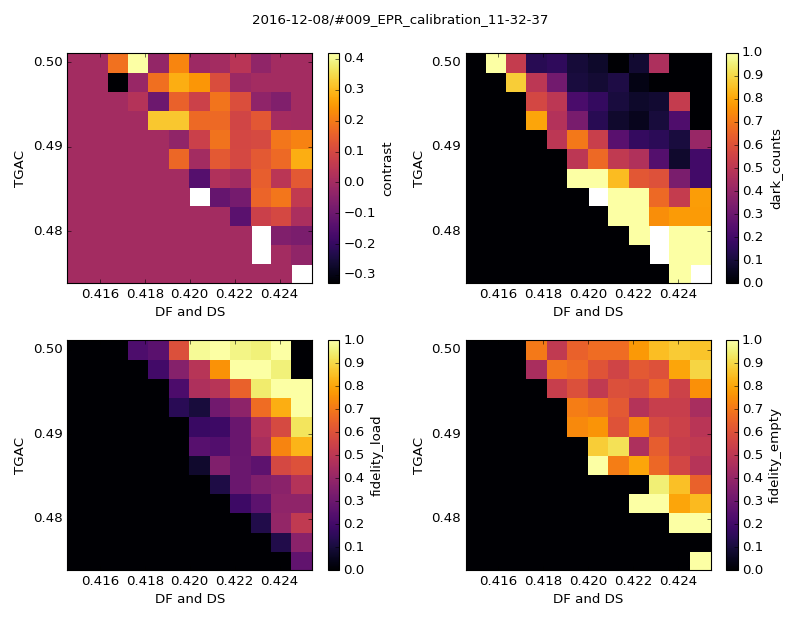

In [2]:
data = qc.load_data('2016-12-08/#009_EPR_calibration_11-32-37')
CalibrationPlot(data)

above epr accidentally done with plunge at 1.5V
DF_DS(0.4195)
TGAC(0.4979)
fidelity_empty: 0.645
fidelity_load: 1.000
fidelity_read: 0.660
up_proportion: 0.373
dark_counts: 0.099
contrast: 0.274

tried run an NMR sweep and the constrast was completly gone, but a DC scan showed that all gates still work
-> new EPR scan
-> no contrast at all
-> new DC scan


<IPython.core.display.Javascript object>


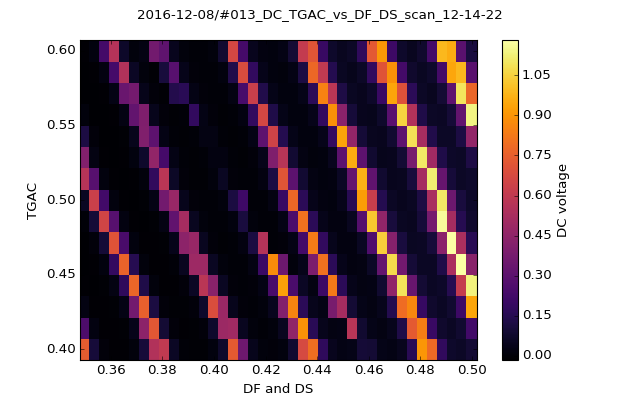

In [3]:
data = qc.load_data('2016-12-08/#013_DC_TGAC_vs_DF_DS_scan_12-14-22')
qc.MatPlot(data.DC_voltage)

DF_DS(0.4173)
TGAC(0.4758)
fidelity_empty: 0.566
fidelity_load: 0.967
fidelity_read: 0.623
up_proportion: 0.459
dark_counts: 0.189
contrast: 0.270

300kHz deviation, 0.5us, 10dbm

<IPython.core.display.Javascript object>


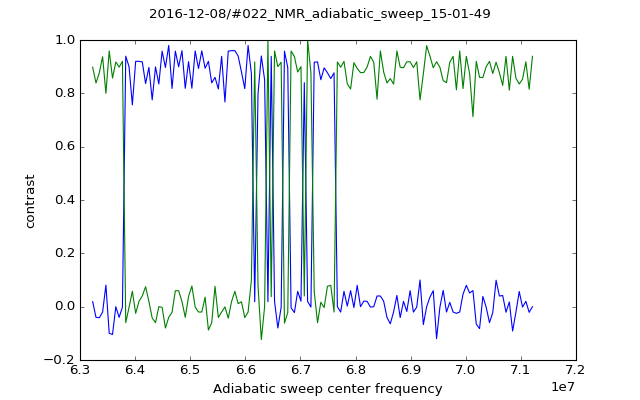

In [4]:
data = qc.load_data('2016-12-08/#022_NMR_adiabatic_sweep_15-01-49')
plot = qc.MatPlot(data.contrast_3_4)
plot.add(data.contrast_5_4)

100kHz deviation, 0.5us, 10dbm

<IPython.core.display.Javascript object>


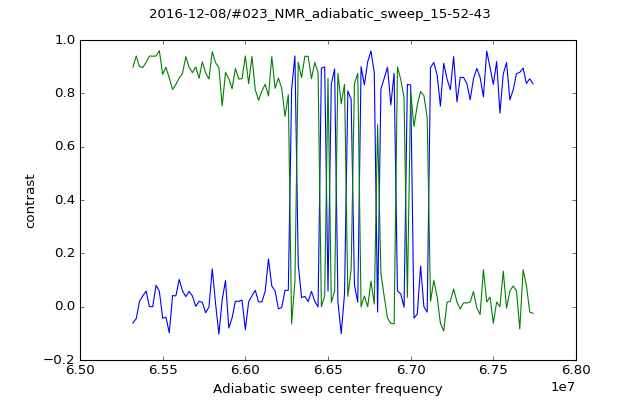

In [5]:
data = qc.load_data('2016-12-08/#023_NMR_adiabatic_sweep_15-52-43')
plot = qc.MatPlot(data.contrast_3_4)
plot.add(data.contrast_5_4)

Below a scan is performed where first the find_ESR_parameter measures contrast at the two ESR frequencies.
Of the two frequencies, the one with the best contrast is chosen to be the current ESR frequency.
This value is used to update adiabatic_sweep_parameter, which then performs a final contrast scan.

This measurement shows that we can update the ESR frequency during a measurement.

<IPython.core.display.Javascript object>


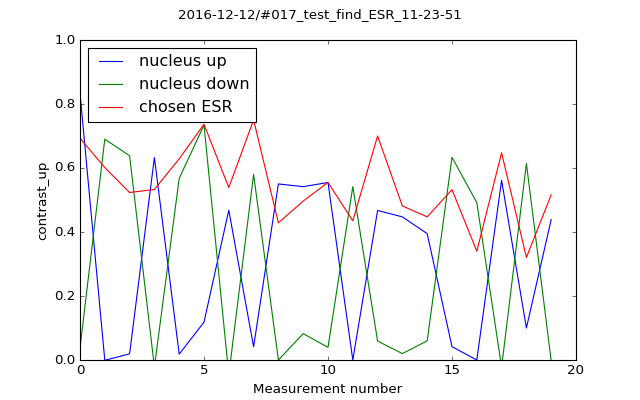

In [6]:
data = qc.load_data('2016-12-12/#017_test_find_ESR_11-23-51')
plot = qc.MatPlot(data.contrast_up, label='nucleus up')
plot.add(data.contrast_down, label='nucleus down')
plot.add(data.contrast_5_4, label='chosen ESR')
plt.xlabel('Measurement number')
plt.ylim(0, 1)
plt.legend(loc='upper left')

One point of concern is that the contrast also seems to fluctuate significantly.
To measure this fluctuation, the contrast is measured continuously for 250 samples each, with the results shown below.
Measurement took 55 mins

<IPython.core.display.Javascript object>


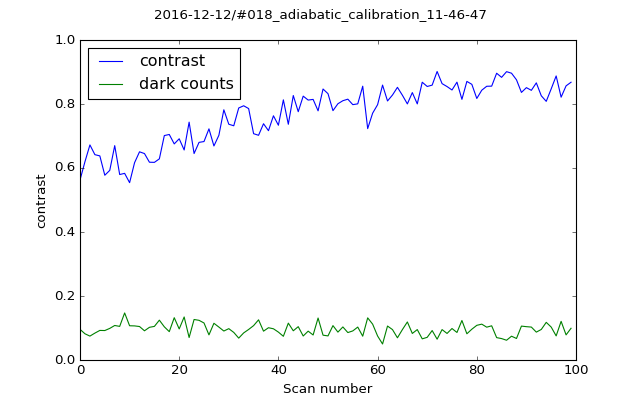

In [7]:
data = qc.load_data( '2016-12-12/#018_adiabatic_calibration_11-46-47')
plot = qc.MatPlot(data.contrast, label='contrast')
plot.add(data.dark_counts, label='dark counts')
plt.xlabel('Scan number')
plt.legend(loc='best');

<IPython.core.display.Javascript object>


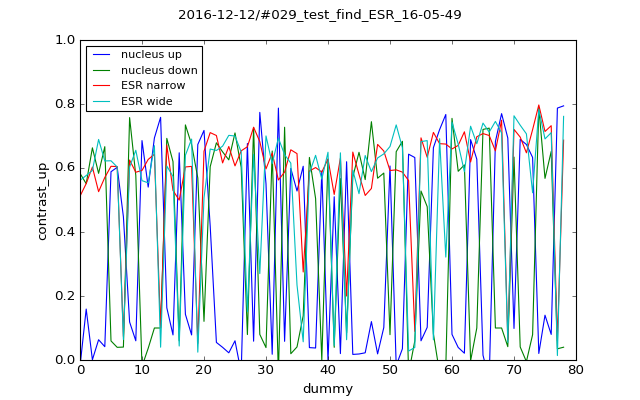

In [8]:
data = qc.load_data( '2016-12-12/#029_test_find_ESR_16-05-49')
plot = qc.MatPlot(data.contrast_up, label='nucleus up')
plot.add(data.contrast_down, label='nucleus down')
plot.add(data.contrast_8_4, label='ESR narrow')
plot.add(data.contrast_12_4, label='ESR wide')
plt.ylim(0, 1)
plt.legend(fontsize=10, loc='best')

Below we performed an oernight scan of the contrast at fixed T1 wait time 4s as we vary the plunge voltage.
Unfortunately we see that the contrast has significantly shifted as time progressed.

<IPython.core.display.Javascript object>


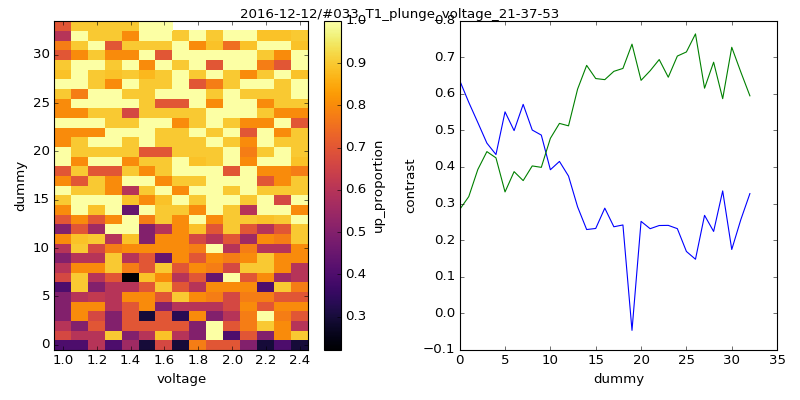

In [19]:
data = qc.load_data('2016-12-12/#033_T1_plunge_voltage_21-37-53')
plot = qc.MatPlot(subplots=(1,2), figsize=(10,5))
plot.add(data.up_proportion_0_4_0, subplot=1)
plot.add(data.contrast, subplot=2)
plot.add(data.dark_counts, subplot=2)
# plot.add(data.ESR_frequency, subplot=2)
plt.tight_layout()

### ESR power dependence

<IPython.core.display.Javascript object>


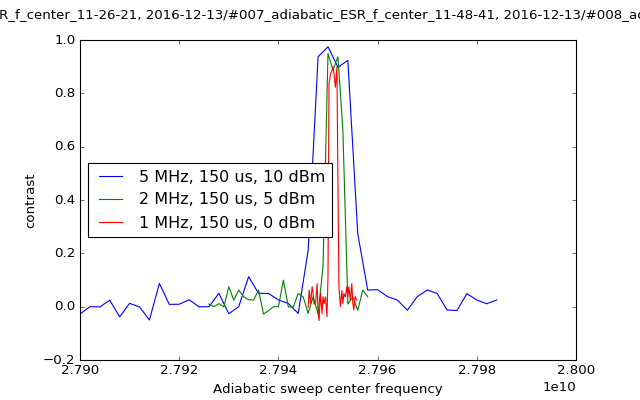

(27900000000.0, 28000000000.0)

In [39]:
#tuning was a bitch again.. 
#DF_DS(0.41388), TGAC(0.4872), fidelity_read: 0.746, up_proportion: 0.966, dark_counts: 0.047, contrast: 0.919
# power 10dbm, duration 0.15ms, freq deviation 5MHz, steps 2MHz
data = qc.load_data('2016-12-13/#006_adiabatic_ESR_f_center_11-26-21')
plot = qc.MatPlot(data.contrast, label='5 MHz, 150 us, 10 dBm')

# power 5dbm, duration 0.15ms, freq deviation 2MHz, steps 1MHz
data = qc.load_data('2016-12-13/#007_adiabatic_ESR_f_center_11-48-41')
plot.add(data.contrast, label='2 MHz, 150 us, 5 dBm')

data = qc.load_data('2016-12-13/#008_adiabatic_ESR_f_center_11-56-46')
plot.add(data.contrast, label='1 MHz, 150 us, 0 dBm')
plt.legend(loc='best')
plt.xlim(27.9e9, 28e9)

<IPython.core.display.Javascript object>


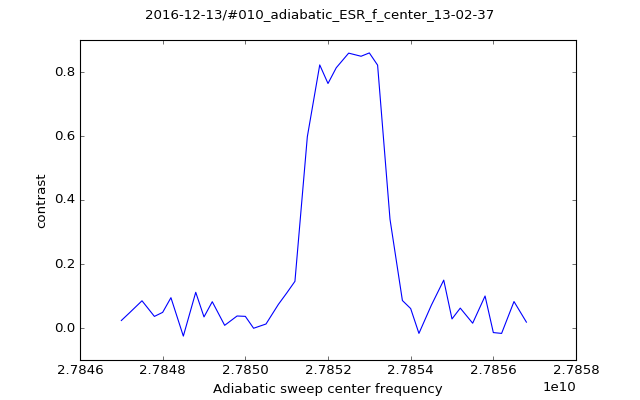

In [40]:
# Other frequency
data = qc.load_data('2016-12-13/#010_adiabatic_ESR_f_center_13-02-37')
plot = qc.MatPlot(data.contrast, label='5 MHz, 150 us, 10 dBm')

# Measurement 2
After figuring out that the nucleus occasionally flipped, we tried performing a DC scan, but noticed strange results.

In [9]:
plt.close('all')

<IPython.core.display.Javascript object>


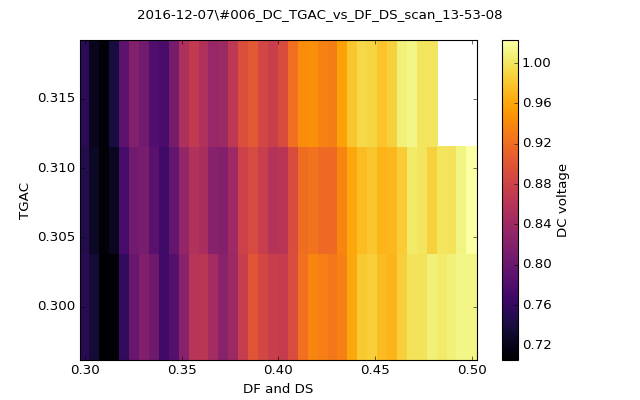

In [33]:
data = qc.load_data('2016-12-07\#006_DC_TGAC_vs_DF_DS_scan_13-53-08')
qc.MatPlot(data.DC_voltage)

Gate voltages
{'DF_raw': 1.938,
 'DS_raw': 1.938,
 'LB_raw': 3.92,
 'RB_raw': 3.92,
 'SRC_raw': 0.25,
 'TGAC_raw': 1.577,
 'TG_raw': 16.48}
 
Pinching off both LB and RB to see if anything changes

<IPython.core.display.Javascript object>


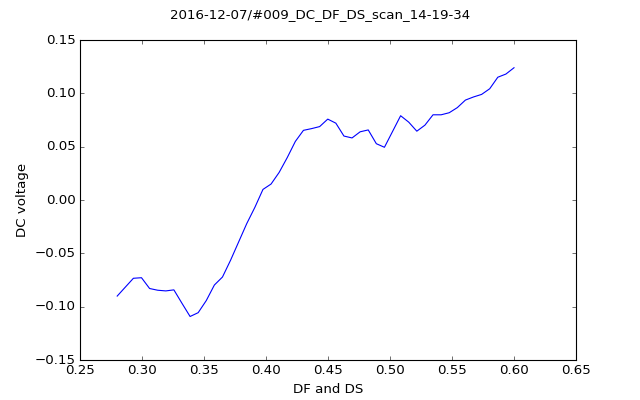

In [34]:
data = qc.load_data('2016-12-07/#009_DC_DF_DS_scan_14-19-34')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


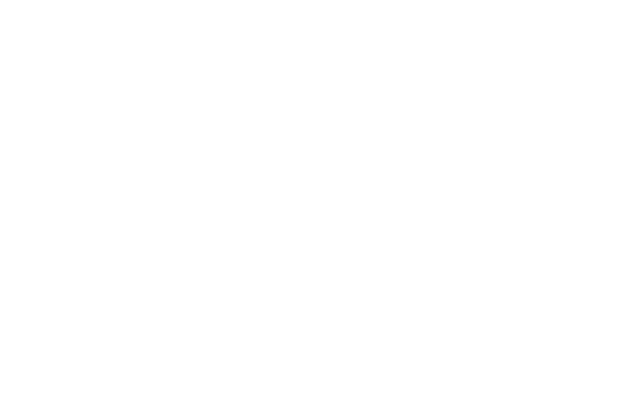

In [12]:
data = qc.load_data('2016-12-07/#009_DC_DF_DS_scan_14-19-34')
qc.MatPlot(data.DC_voltage)

## Turnon

<IPython.core.display.Javascript object>


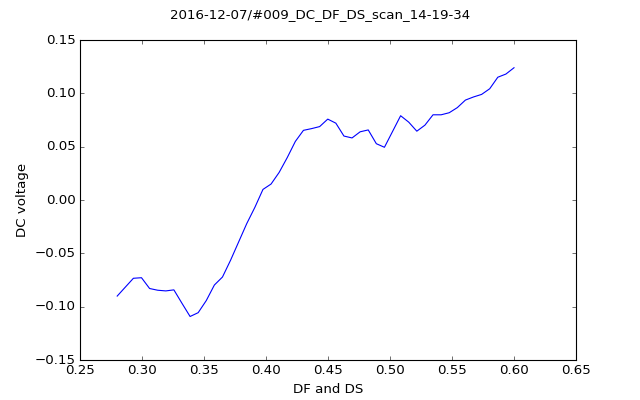

In [35]:
data = qc.load_data('2016-12-07/#009_DC_DF_DS_scan_14-19-34')
qc.MatPlot(data.DC_voltage)

## Pinchoff

<IPython.core.display.Javascript object>


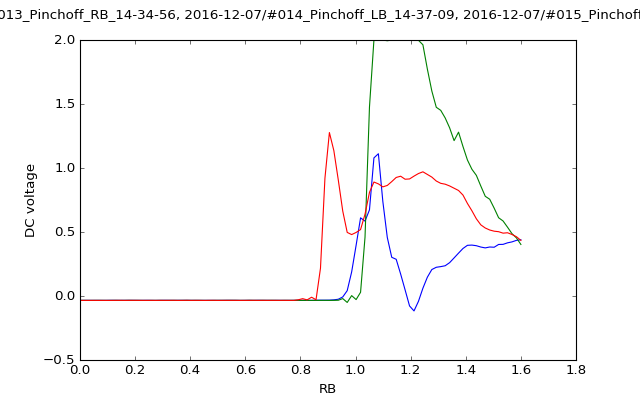

In [36]:
data = qc.load_data('2016-12-07/#013_Pinchoff_RB_14-34-56')
plot = qc.MatPlot(data.DC_voltage)

data = qc.load_data('2016-12-07/#014_Pinchoff_LB_14-37-09')
plot.add(data.DC_voltage)

data = qc.load_data('2016-12-07/#015_Pinchoff_TG_14-39-22')
plot.add(data.DC_voltage)



Here we take a scan at fixed turnon voltage 1.4V.
The x-axis is time in seconds

<IPython.core.display.Javascript object>


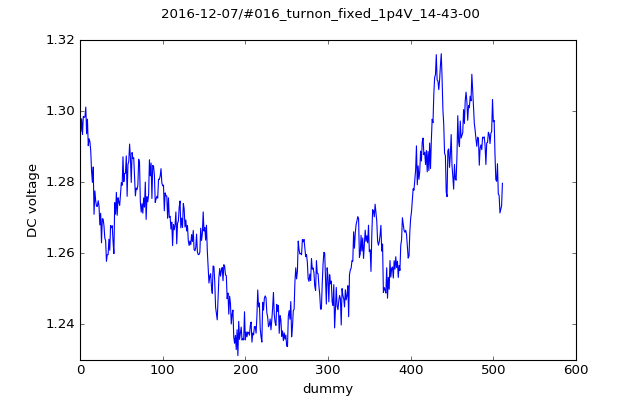

In [37]:
data = qc.load_data('2016-12-07/#016_turnon_fixed_1p4V_14-43-00')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


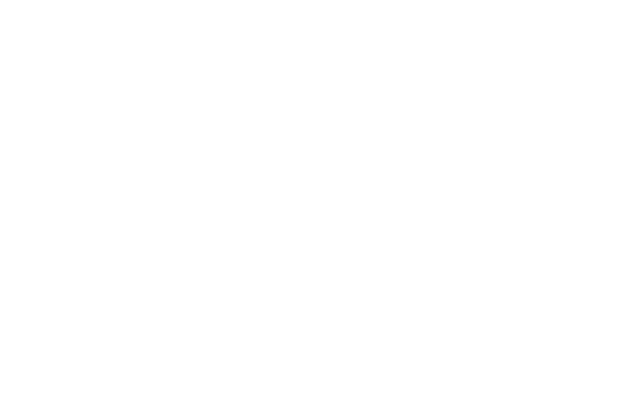

In [16]:
data = qc.load_data('2016-12-07/#023_DC_TGAC_vs_DF_DS_scan_16-36-19')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


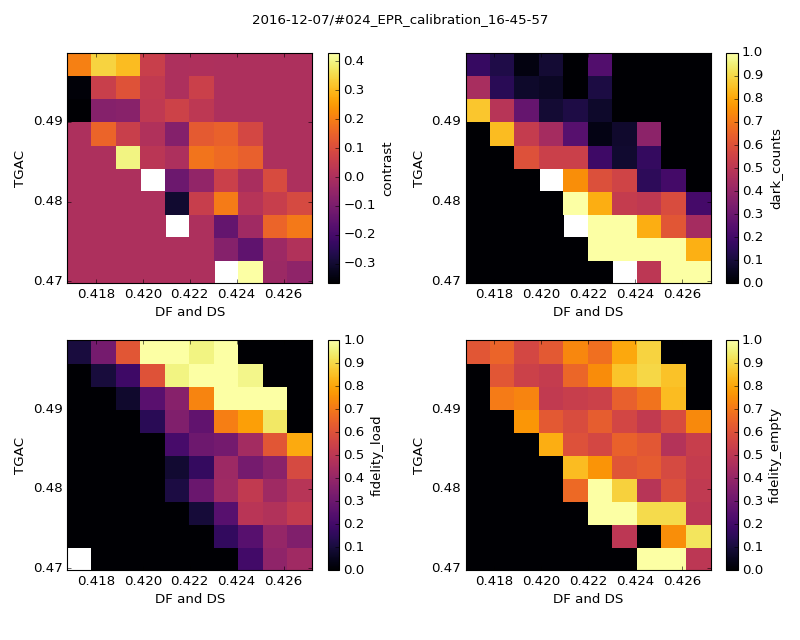

In [38]:
data = qc.load_data('2016-12-07/#024_EPR_calibration_16-45-57')
CalibrationPlot(data)

no points with contrast above 20%
increase plunge depth to 1.8V

<IPython.core.display.Javascript object>


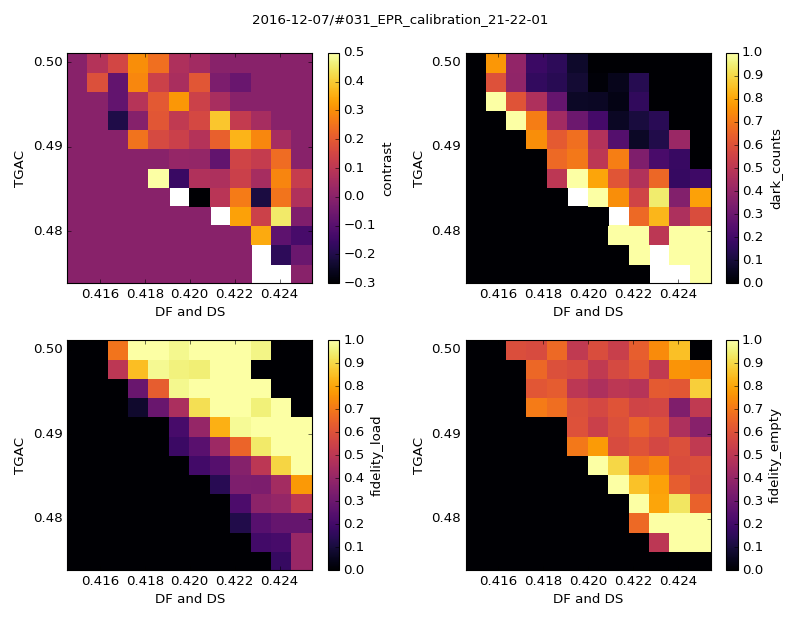

In [39]:
data = qc.load_data('2016-12-07/#031_EPR_calibration_21-22-01')
CalibrationPlot(data)

working point 
DF_DS(0.4213)
TGAC(0.4933)
fidelity_empty: 0.550
fidelity_load: 1.000
fidelity_read: 0.853
up_proportion: 0.377
dark_counts: 0.053
contrast: 0.323

<IPython.core.display.Javascript object>


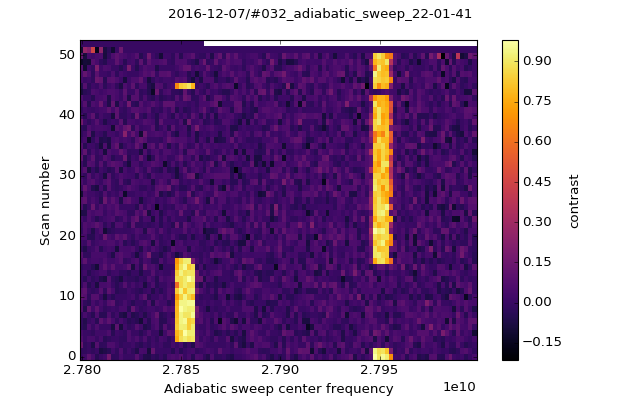

In [41]:
data = qc.load_data('2016-12-07/#032_adiabatic_sweep_22-01-41')
qc.MatPlot(data.contrast)
plt.ylabel('Scan number')

0.15us duration with 10dBm power and 5MHz deviation
ESR frequency nuc spin up = 27.852GHz
ESR frequency nuc spin down = 27.951GHz
-> hyperfine constant A=99MHz

# Measurement 1

In [27]:
plt.close('all')

<IPython.core.display.Javascript object>


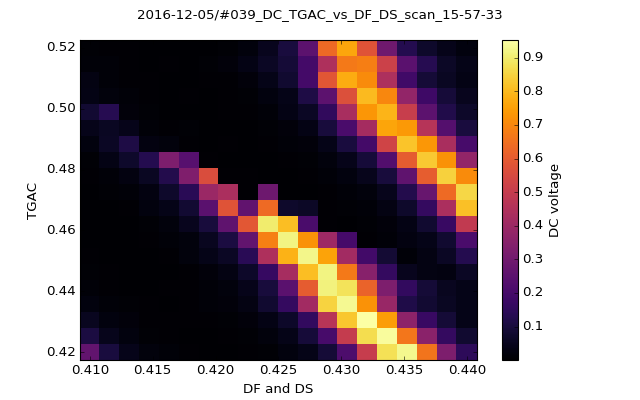

In [28]:
data = qc.load_data('2016-12-05/#039_DC_TGAC_vs_DF_DS_scan_15-57-33')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


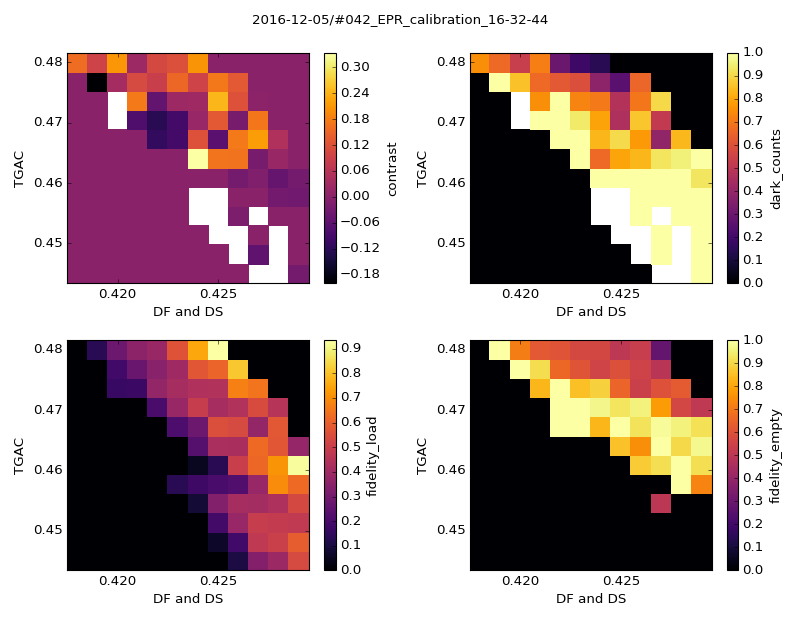

In [22]:
data = qc.load_data('2016-12-05/#042_EPR_calibration_16-32-44')
CalibrationPlot(data)

<IPython.core.display.Javascript object>


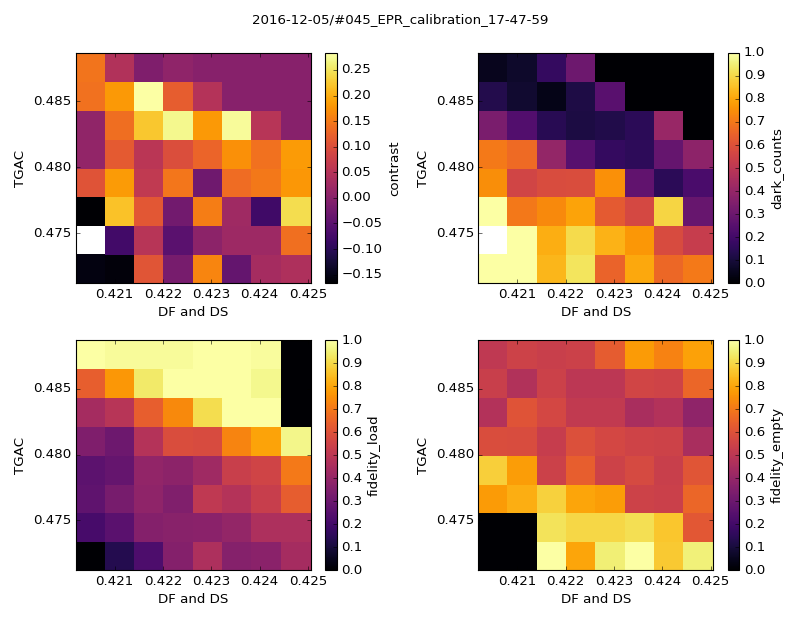

In [29]:
data = qc.load_data('2016-12-05/#045_EPR_calibration_17-47-59')
CalibrationPlot(data)

DF_DS(0.42201)
TGAC(0.4835)

fidelity_empty: 0.448
fidelity_load: 0.771
fidelity_read: 0.707
up_proportion: 0.328
dark_counts: 0.108
contrast: 0.220

<IPython.core.display.Javascript object>


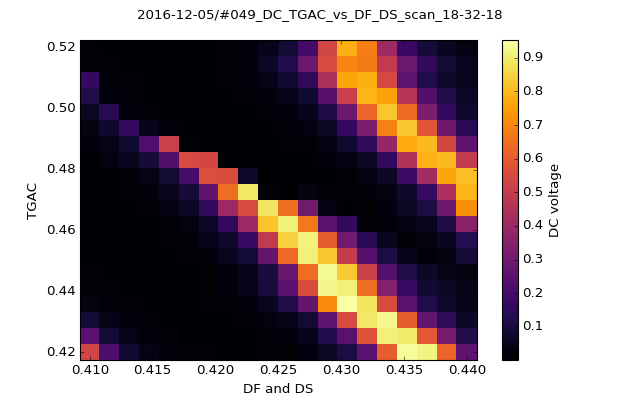

In [30]:
data = qc.load_data('2016-12-05/#049_DC_TGAC_vs_DF_DS_scan_18-32-18')
qc.MatPlot(data.DC_voltage)

Retuned with settings

DF_DS(0.42236)
TGAC(0.48218)

fidelity_empty: 0.615
fidelity_load: 0.621
fidelity_read: 0.760
up_proportion: 0.374
dark_counts: 0.087
contrast: 0.287

<IPython.core.display.Javascript object>


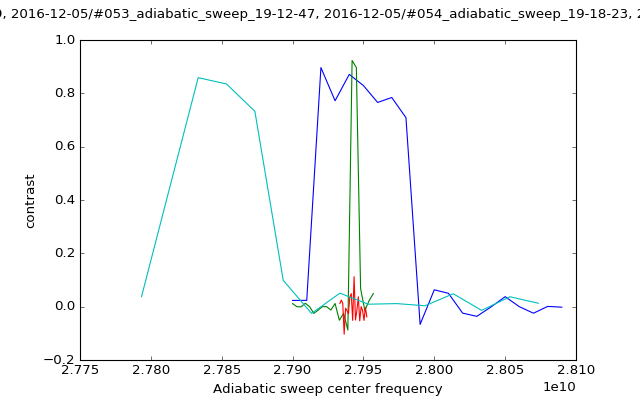

In [31]:
data = qc.load_data('2016-12-05/#052_adiabatic_sweep_19-07-59')
plot = qc.MatPlot(data.contrast)

data = qc.load_data('2016-12-05/#053_adiabatic_sweep_19-12-47')
plot.add(data.contrast)

data = qc.load_data('2016-12-05/#054_adiabatic_sweep_19-18-23')
plot.add(data.contrast)

data = qc.load_data('2016-12-05/#057_adiabatic_sweep_19-27-16')
plot.add(data.contrast)

Results looked better, but in the final scan with 10 MHz window, all of the contrast was gone.
The fourth scan was taken with a larger window, and the ESR frequency has clearly shifted

<IPython.core.display.Javascript object>


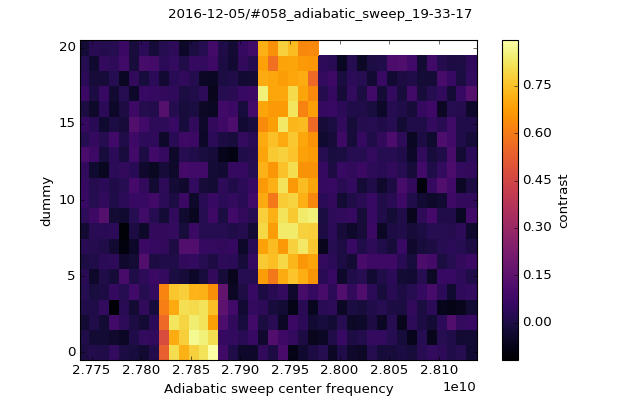

In [32]:
data = qc.load_data('2016-12-05/#058_adiabatic_sweep_19-33-17')
plot = qc.MatPlot(data.contrast)

After talking with Arne, we realized this was due to a shift of the nucleus.
Unfortunately we do not currently have a way to deal with this, so we will either have to implement NMR, or perform two successive ESR adiabatic sweeps.